# OCT 

## Import


In [1]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import tensorflow as tf
import math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sklearn
import os
import pandas as pd
import numpy as np
from sklearn.metrics import auc, confusion_matrix
from matplotlib import pyplot as plt
import datetime
from PIL import Image
import glob

%load_ext tensorboard
import tensorboard #to use tensorboard on CSCSP

In [2]:
def plot_value_array(i, predictions_array, true_label):
    #true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(predictions_array)))
    
    thisplot = plt.bar(range(len(predictions_array)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    #thisplot[true_label].set_color('blue')

Example image: 


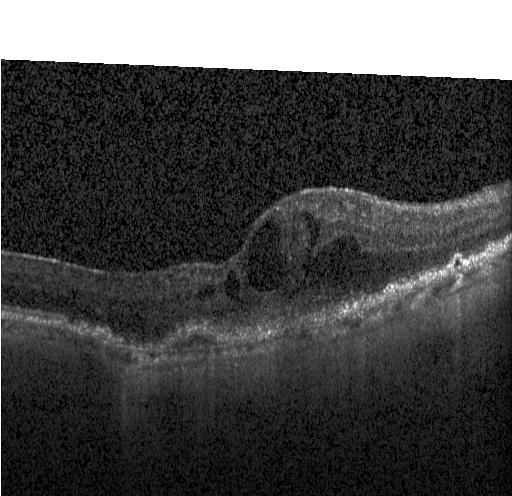

(83484, 128, 128)


In [3]:
#img_height, img_width = 240, 240
root_path = "./RetinalOCTImages/OCT2017 /"
train_path = root_path + "train/"
val_path = root_path + "val/"
test_path = root_path + "test/"


X_train = []
classes = ["CNV", "DME", "DRUSEN", "NORMAL"]
lenghts = {"CNV": 0, "DME": 0, "DRUSEN": 0, "NORMAL": 0}
random_image = np.random.randint(low=0, high=1000)
for cl in classes:
    for i in glob.glob(train_path+cl+"/"+'*.jpeg'):
        lenghts[cl]+=1
        X_train.append(np.asarray(Image.open(i).resize([128,128])))
        if(len(X_train)==random_image):
            print("Example image: ")
            display(Image.open(i))

X_train = np.asarray(X_train, dtype=np.float32)
print(X_train.shape)
del random_image


In [4]:

X_test = []
classes = ["CNV", "DME", "DRUSEN", "NORMAL"]
lenghts_test = {"CNV": 0, "DME": 0, "DRUSEN": 0, "NORMAL": 0}
for cl in classes:
    for i in glob.glob(test_path+cl+"/"+'*.jpeg'):
        lenghts_test[cl]+=1
        X_test.append(np.asarray(Image.open(i).resize([128,128])))
        
X_test = np.asarray(X_test, dtype=np.float32)


In [5]:
X_val = []
classes = ["CNV", "DME", "DRUSEN", "NORMAL"]
lenghts_val = {"CNV": 0, "DME": 0, "DRUSEN": 0, "NORMAL": 0}
for cl in classes:
    for i in glob.glob(val_path+cl+"/"+'*.jpeg'):
        lenghts_val[cl]+=1
        X_val.append(np.asarray(Image.open(i).resize([128,128])))
X_val= np.asarray(X_val, dtype=np.float32)

In [6]:
#classes = ["CNV", "DME", "DRUSEN", "NORMAL"]

y_train = np.concatenate((np.full((lenghts["CNV"]), 0), np.full((lenghts["DME"]), 1), np.full((lenghts["DRUSEN"]), 2), np.full((lenghts["NORMAL"]), 3)))
y_val = np.concatenate((np.full((lenghts_val["CNV"]), 0), np.full((lenghts_val["DME"]), 1), np.full((lenghts_val["DRUSEN"]), 2), np.full((lenghts_val["NORMAL"]), 3)))
from sklearn.utils import shuffle
print(X_train.shape, y_train.shape)

X_train, y_train = shuffle(X_train, y_train)

(83484, 128, 128) (83484,)


In [10]:

X_train=X_train[:,  :, :, np.newaxis]
X_val=X_val[:,  :, :, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(y_val.shape, X_val.shape)

(83484, 128, 128, 1)
(83484,)
(32,) (32, 128, 128, 1)


In [8]:
model = models.Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(4)
])
#model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-26 11:55:24.053391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-26 11:55:24.053553: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val), batch_size=64)

Epoch 1/10


2022-07-26 11:56:12.601637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1305/1305 [==============================] - 105s 79ms/step - loss: 1.2120 - accuracy: 0.4970 - val_loss: 0.7904 - val_accuracy: 0.6875
Epoch 2/10
   1/1305 [..............................] - ETA: 1:42 - loss: 1.0466 - accuracy: 0.6250

2022-07-26 11:57:57.033597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1305/1305 [==============================] - 103s 79ms/step - loss: 1.0991 - accuracy: 0.5164 - val_loss: 0.7979 - val_accuracy: 0.6875
Epoch 3/10
1305/1305 [==============================] - 102s 78ms/step - loss: 1.0774 - accuracy: 0.5251 - val_loss: 0.7276 - val_accuracy: 0.6875
Epoch 4/10
1305/1305 [==============================] - 104s 79ms/step - loss: 1.0550 - accuracy: 0.5335 - val_loss: 0.3004 - val_accuracy: 0.9375
Epoch 5/10
1305/1305 [==============================] - 102s 78ms/step - loss: 1.0353 - accuracy: 0.5405 - val_loss: 0.2557 - val_accuracy: 0.9375
Epoch 6/10
1305/1305 [==============================] - 101s 78ms/step - loss: 1.0207 - accuracy: 0.5455 - val_loss: 0.3013 - val_accuracy: 0.9062
Epoch 7/10
1305/1305 [==============================] - 103s 79ms/step - loss: 1.0086 - accuracy: 0.5501 - val_loss: 0.2733 - val_accuracy: 0.9062
Epoch 8/10
1305/1305 [==============================] - 103s 79ms/step - loss: 0.9967 - accuracy: 0.5546 - val_loss: 0.6238 - val

In [17]:

y_test = np.concatenate((np.full((lenghts_test["CNV"]), 0), np.full((lenghts_test["DME"]), 1), np.full((lenghts_test["DRUSEN"]), 2), np.full((lenghts_test["NORMAL"]), 3)))
print(X_test.shape, y_test.shape)
X_test = X_test[:,  :, :, np.newaxis]
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


print('\nTest accuracy:', test_acc)

(968, 128, 128) (968,)
31/31 - 1s - loss: 0.7048 - accuracy: 0.8647 - 601ms/epoch - 19ms/step

Test accuracy: 0.8646695017814636


17/31 [===============>..............] - ETA: 0s

2022-07-26 12:48:01.593794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 0s 10ms/step


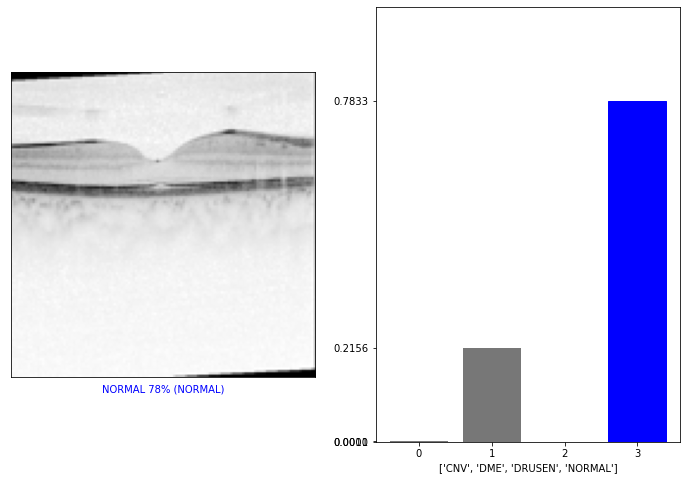

In [61]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)


predictions[0]
np.argmax(predictions[0])



def plot_image(i, predictions_array, true_label, img):
        predictions_array, true_label, img = predictions_array, true_label[i], img[i]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

        plt.imshow(img, cmap=plt.cm.binary)

        predicted_label = np.argmax(predictions_array)
        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                        100*np.max(predictions_array),
                                        classes[true_label]),
                                        color=color)
        

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.xlabel(classes)
  plt.yticks(predictions_array)

%matplotlib inline
i = 960
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

In [57]:
'''
from ipywidgets import widgets, interact, Image
i = 960
output_slider_variable = widgets.Text()
# Define function to bind value of the input to the output variable 
def f(x):
    output_slider_variable.value = str(x)
    

plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()'''

<IPython.core.display.Javascript object>

## Saving the entire model


In [63]:
#!mkdir -p saved_model
model.save('./saved_model/OCTmodel')

INFO:tensorflow:Assets written to: ./saved_model/OCTmodel/assets


INFO:tensorflow:Assets written to: ./saved_model/OCTmodel/assets
